<a class="anchor" id="top"></a>
**Formation Data Scientist - Projet 4**

**Anticipez les besoins en consommation électrique de bâtiments**

**Partie 1 : Nettoyage et Exploration**

Antoine LEPAGE <br /> 
yop1001@gmail.com

https://openclassrooms.com/fr/projects/629/assignment

**Table des matières**


1. [Contexte](#contexte)<br /> 
<br /> 
2. [Librairies et fonctions](#librairies)<br /> 
<br /> 
3. [Importation des données](#importation)<br />
<br />
4. [Sample cible du dataframe](#sample)<br />
    4.1. [Filtre sur le batiments non residentiels](#filtre_nonresid)<br />
    4.2. [Choix des variables](#choix_variables)<br />
<br />    
5. [Nettoyage](#nettoyage)<br />
    5.1. [Valeurs manquantes](#valeurs_manquantes)<br />
    5.2. [Valeurs aberrantes](#valeurs_aberrantes)<br />
    5.3. [Vérification de la clef unique](#verif_primarykey)<br />
    
    5.4. [Inspection par variables](#inspection_variable)<br />
    5.4.1. [PrimaryPropertyType](#PrimaryPropertyType)<br />
    5.4.2. [PropertyName](#PropertyName)<br />
    5.4.3. [Location](#location)<br />
    5.4.4. [CouncilDistrictCode](#CouncilDistrictCode)<br />
    5.4.5. [Neighborhood](#Neighborhood)<br />
    5.4.6. [YearBuilt](#YearBuilt)<br />
    5.4.7. [NumberofBuildings](#NumberofBuildings)<br />
    5.4.8. [NumberofFloors](#NumberofFloors)<br />
    5.4.9. [PropertyGFATotal](#PropertyGFATotal)<br />
    5.4.10. [PropertyGFAParking and PropertyGFABuilding(s) ](#PropertyGFAParking_PropertyGFABuilding)<br />
    5.4.11. [YearsENERGYSTARCertified](#YearsENERGYSTARCertified)<br />
    5.4.12. [ENERGYSTARScore](#ENERGYSTARScore)<br />
    5.4.13. [Variables sur l'énergie consommée et les rejets de C02](#variables_nrj_cO2)<br />
    5.4.14. [ComplianceStatus](#ComplianceStatus)<br />
    5.4.15. [Outlier](#Outlier)
    
    5.5. [Traitements des outliers avant modélisation](#outliers)<br />
  <br />    
6. [Exploration](#exploration)<br />
    6.1. [Comportements par types de bâtiments](#types_bat)<br />
    6.2. [Totaux par type de bâtiments](#totaux_bat)<br />
    6.3. [Corrélations](#correlations)<br />
    6.4. [Cartographie](#cartographie)<br />
<br />      


<a class="anchor" id="contexte"></a>
# 1. Contexte 

La ville de Seattle a pour objectif de devenir une ville neutre en émissions de carbone en 2050. Notre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Des [relevés minutieux](https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv) ont été effectués par nos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire pour les bâtiments non mesurés :
- les émissions de CO2
- la consommation totale d’énergie des bâtiments

Par ailleurs, nous cherchons  à évaluer l’intérêt de [l'ENERGIE STAR Score](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what) pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

https://en.wikipedia.org/wiki/Street_layout_of_Seattle


<a class="anchor" id="librairies"></a>
***
# 2. Librairies et fonctions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


sns.set_style("whitegrid")
seahawks_blue='#002244'

#import statsmodels.api as sm
#from statsmodels.formula.api import ols

#from scipy.stats import chisquare

In [2]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
        #mis_val_table_ren_columns = mis_val_table_ren_columns[
        #    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        #'% of Total Values', ascending=False).round(1)
        #print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        #    "There are " + str(mis_val_table_ren_columns.shape[0]) +
        #      " columns that have missing values.")
        return mis_val_table_ren_columns

<a class="anchor" id="importation"></a>
***
# 3. Importation des données


In [3]:
# Source : https://datacatalog.worldbank.org/dataset/education-statistics
data = pd.read_csv('01 - Sources/2015-building-energy-benchmarking.csv', sep=',')
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'needs_recoding': ...",7,DOWNTOWN,1927,...,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'needs_recoding': ...",7,DOWNTOWN,1996,...,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'needs_recoding': ...",7,DOWNTOWN,1969,...,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'needs_recoding': ...",7,DOWNTOWN,1926,...,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'needs_recoding': F...",7,DOWNTOWN,1980,...,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN


In [4]:
# Import des batiments de Seattle datant de 1900
# source : 
buildings_1900 = pd.read_excel('01 - Sources/1900_buildings.xlsx', usecols=['Address', 'Historic Name', 'Common Name'])
buildings_1900.head()

,Address,Historic Name,Common Name
0,826 14TH AVE,NaN,NaN
1,906 24TH AVE,NaN,NaN
2,1235 S KING ST S,NaN,NaN
3,1122 13TH AVE,NaN,NaN
4,1114 13TH AVE,NaN,NaN


In [5]:
buildings_1900['Address'] = buildings_1900['Address'].str.upper()
buildings_1900['Common Name'] = buildings_1900['Common Name'].str.upper()

<a class="anchor" id="sample"></a>
***
# 4. Sample cible du dataframe


<a class="anchor" id="filtre_nonresid"></a>
## 4.1. Filtre sur les batiments non residentiels

In [6]:
data.shape

(3340, 42)

In [7]:
# visualisation des valeurs de la variable
data['BuildingType'].value_counts().head(10)

NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

In [8]:
# Filtre sur les batiments non residentiels
data = data.loc[(data['BuildingType']=='NonResidential') | (data['BuildingType']=='Nonresidential COS')]

In [9]:
# Détail du type d'immeuble
pd.crosstab(data['PrimaryPropertyType'], data['BuildingType'])

BuildingType,NonResidential,Nonresidential COS
PrimaryPropertyType,,
College/University,16,0
Distribution Center,2,0
Distribution Center\n,49,2
Hospital,10,0
Hotel,73,0
K-12 School,39,0
Laboratory,1,0
Large Office,167,3
Low-Rise Multifamily,1,0


In [10]:
data.shape

(1529, 42)

<a class="anchor" id="choix_variables"></a>
***
## 4.2. Choix des variables

In [11]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Choix des variables :

Métadonnées :
- OSEBuildingID : clef primaire identifiant l'immeuble
- PropertyName : nom du batiment
- ComplianceStatus 
- Outlier

Variables qualitatives :
- PrimaryPropertyType : type de batiment
- Location : emplacement géographique du batiment
- CouncilDistrictCode : Seattle council district
- Neighborhood

Variables quantitatives : 
- NumberofFloors : nombre d'étages
- PropertyGFATotal : surface de plancher Total
- PropertyGFAParking : surface de plancher parking
- PropertyGFABuilding(s) : surface de plancher immeuble
- YearBuilt
- NumberofBuildings

Energy Star :
- YearsENERGYSTARCertified : 
- ENERGYSTARScore : 

Variables quantitatives à expliquer :
- SiteEnergyUse(kBtu) :  energie consommée sur l'année
- SiteEUI(kBtu/sf) : energie au foot²consommée sur l'année
- GHGEmissions(MetricTonsCO2e) : emissions de C02 sur l'année
- GHGEmissionsIntensity(kgCO2e/ft2) :  emissions de C02 au foot²

In [12]:
# Filtre sur les variables interessantes
data = data[['OSEBuildingID', 'PrimaryPropertyType','PropertyName', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
        'ComplianceStatus', 'Outlier']]

In [13]:
data.shape

(1529, 20)

<a class="anchor" id="nettoyage"></a>
***
# 5. Nettoyage


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1529 entries, 0 to 3334
Data columns (total 20 columns):
OSEBuildingID                        1529 non-null int64
PrimaryPropertyType                  1529 non-null object
PropertyName                         1529 non-null object
Location                             1529 non-null object
CouncilDistrictCode                  1529 non-null int64
Neighborhood                         1529 non-null object
YearBuilt                            1529 non-null int64
NumberofBuildings                    1529 non-null int64
NumberofFloors                       1522 non-null float64
PropertyGFATotal                     1529 non-null int64
PropertyGFAParking                   1529 non-null int64
PropertyGFABuilding(s)               1529 non-null int64
YearsENERGYSTARCertified             83 non-null object
ENERGYSTARScore                      1022 non-null float64
SiteEUI(kBtu/sf)                     1528 non-null float64
SiteEnergyUse(kBtu)          

Les types de données par colonnes semblent être ok

<a class="anchor" id="valeurs_manquantes"></a>
***
## 5.1. Valeurs manquantes

In [15]:
# table missing_values
missing_values = missing_values_table(data)
missing_values['total'] = data.shape[0]
missing_values.sort_values('% of Missing Values', ascending=True, inplace=True)
missing_values

,Missing Values,% of Missing Values,total
OSEBuildingID,0,0.000000,1529
PropertyGFABuilding(s),0,0.000000,1529
PropertyGFAParking,0,0.000000,1529
ComplianceStatus,0,0.000000,1529
NumberofBuildings,0,0.000000,1529
YearBuilt,0,0.000000,1529
PropertyGFATotal,0,0.000000,1529
CouncilDistrictCode,0,0.000000,1529
Location,0,0.000000,1529
PropertyName,0,0.000000,1529


***

In [16]:
# NaN of NumberofFloors
data.loc[data['NumberofFloors'].isnull()]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier
3171,40028,Non-Refrigerated Warehouse,"SAND POINT BUILDING 5A,5B,5C,5D","{'latitude': '47.68384449', 'needs_recoding': ...",4,NORTHEAST,1940,1,NaN,384772,0,384772,NaN,65.0,37.2,15411831.0,406.74,0.96,Compliant,NaN
3172,40031,Medical Office,SAND POINT BUILDING 25,"{'latitude': '47.68219493', 'needs_recoding': ...",4,NORTHEAST,1960,1,NaN,30287,0,30287,NaN,56.0,62.1,1976647.0,27.88,0.68,Compliant,NaN
3173,40034,Medical Office,SAND POINT BUILDING 29,"{'latitude': '47.68219493', 'needs_recoding': ...",4,NORTHEAST,1960,1,NaN,21931,0,21931,NaN,21.0,133.3,3732139.0,137.63,6.02,Compliant,NaN
3193,43948,Other,GEORGETOWN STEAM PLANT,"{'latitude': '47.56158829', 'needs_recoding': ...",2,GREATER DUWAMISH,1906,1,NaN,39212,0,39212,NaN,NaN,19.7,773013.0,5.39,0.05,Compliant,NaN
3209,49705,Other,MAGNUSON PARK CAMPUS,"{'latitude': '47.68317875', 'needs_recoding': ...",4,NORTHEAST,1929,7,NaN,502030,0,502030,NaN,NaN,30.6,17290816.0,472.56,0.86,Compliant,NaN
3311,49958,Other,FIRST HILL STREET CAR MAINTENANCE,"{'latitude': '47.59524558', 'needs_recoding': ...",2,GREATER DUWAMISH,2014,1,NaN,20993,0,20993,NaN,NaN,43.5,912558.0,12.28,0.42,Compliant,NaN
3313,49966,Other,SMILOW RAINIER VISTA BOYS & GIRLS CLUB,"{'latitude': '47.54102707', 'needs_recoding': ...",2,SOUTHEAST,2009,1,NaN,40265,0,40265,NaN,NaN,48.6,1957356.0,42.40,0.91,Compliant,NaN


In [17]:
# Estimations à partir du type de batiment (mediane de la classe)
a = data.loc[data['PrimaryPropertyType']=='Non-Refrigerated Warehouse', 'NumberofFloors'].median()
b = data.loc[data['PrimaryPropertyType']=='Medical Office', 'NumberofFloors'].median()
c = data.loc[data['PrimaryPropertyType']=='Other', 'NumberofFloors'].median()

# remplacement par la mediane pour les 'Non-Refrigerated Warehouse'
data.loc[(data['PrimaryPropertyType']=='Non-Refrigerated Warehouse') & (data['NumberofFloors'].isnull()), 'NumberofFloors'] = a
data.loc[(data['PrimaryPropertyType']=='Medical Office') & (data['NumberofFloors'].isnull()), 'NumberofFloors'] = b
data.loc[(data['PrimaryPropertyType']=='Other') & (data['NumberofFloors'].isnull()), 'NumberofFloors'] = c

***

In [18]:
# NaN of SiteEnergyUse(kBtu) / SiteEnergyUseWN(kBtu) / GHGEmissions(MetricTonsCO2e)	 
data.loc[data['SiteEnergyUse(kBtu)'].isnull()]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier
2406,25451,Restaurant\n,YALE STREET LANDING,"{'latitude': '47.62918016', 'needs_recoding': ...",3,LAKE UNION,1978,1,2.0,26519,0,26519,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,NaN


In [19]:
data.shape

(1529, 20)

In [20]:
# Suppression de ce batiment
data = data[data['SiteEnergyUse(kBtu)'].notnull()]

In [21]:
# Vérification
data.shape

(1528, 20)

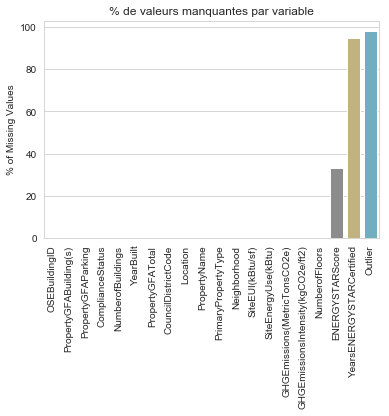

In [22]:
# % de valeurs manquantes par variable
sns.barplot(x=missing_values.index, y=missing_values['% of Missing Values'], palette="deep")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.title('% de valeurs manquantes par variable')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/valeurs_manquantes_percent.png', dpi=200, bbox_inches='tight')
plt.show()

***

In [23]:
# table missing_values - verification
missing_values_table(data)

,Missing Values,% of Missing Values
OSEBuildingID,0,0.000000
PrimaryPropertyType,0,0.000000
PropertyName,0,0.000000
Location,0,0.000000
CouncilDistrictCode,0,0.000000
Neighborhood,0,0.000000
YearBuilt,0,0.000000
NumberofBuildings,0,0.000000
NumberofFloors,0,0.000000
PropertyGFATotal,0,0.000000


<a class="anchor" id="valeurs_aberrantes"></a>
***
## 5.2. Valeurs Aberrantes

In [24]:
data.describe()

,OSEBuildingID,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1.528000e+03,1528.000000,1.528000e+03,1022.000000,1528.000000,1.528000e+03,1528.00000,1528.000000
mean,15750.571990,4.431937,1960.378927,1.013089,4.284686,1.107051e+05,14340.153141,9.636491e+04,62.374755,72.656152,7.553921e+06,162.77091,1.355969
std,12926.466337,2.202713,32.879706,0.258121,6.782193,1.904276e+05,45259.032917,1.643314e+05,29.064376,72.197923,1.853717e+07,557.26700,2.119639
min,1.000000,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-2.000000,-5.055000e+04,1.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,601.750000,2.000000,1929.000000,1.000000,1.000000,2.880000e+04,0.000000,2.779700e+04,43.000000,33.100000,1.149832e+06,18.49250,0.160000
50%,21139.000000,4.000000,1964.500000,1.000000,2.000000,4.730250e+04,0.000000,4.511350e+04,69.000000,53.100000,2.508795e+06,46.92000,0.640000
75%,24513.250000,7.000000,1988.000000,1.000000,4.000000,1.024078e+05,0.000000,9.034525e+04,86.000000,83.825000,6.994638e+06,135.03250,1.640000
max,50038.000000,7.000000,2014.000000,7.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,100.000000,800.600000,2.958126e+08,11824.89000,31.380000


Sera traité dans la partie inspection variable par variable.

***

<a class="anchor" id="verif_primarykey"></a>
***
## 5.3. Vérification de la clef unique 

In [25]:
# Compter le nombre de 'code' en doublon
data['OSEBuildingID'].duplicated(keep=False).sum()

0

La variable *OSEBuildingID* est bien une clef primaire

In [26]:
# Mettons en index cette clef unique
data.set_index('OSEBuildingID', inplace=True)

<a class="anchor" id="inspection_variable"></a>
***
## 5.4. Inspection par variable

In [27]:
data.head()

,PrimaryPropertyType,PropertyName,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier
OSEBuildingID,,,,,,,,,,,,,,,,,,,
1,Hotel,MAYFLOWER PARK HOTEL,"{'latitude': '47.61219025', 'needs_recoding': ...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,NaN,65.0,78.9,6981428.0,249.43,2.64,Compliant,NaN
2,Hotel,PARAMOUNT HOTEL,"{'latitude': '47.61310583', 'needs_recoding': ...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,NaN,51.0,94.4,8354235.0,263.51,2.38,Compliant,NaN
3,Hotel,WESTIN HOTEL,"{'latitude': '47.61334897', 'needs_recoding': ...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,NaN,18.0,96.6,73130656.0,2061.48,1.92,Compliant,NaN
5,Hotel,HOTEL MAX,"{'latitude': '47.61421585', 'needs_recoding': ...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,NaN,1.0,460.4,28229320.0,1936.34,31.38,Compliant,High Outlier
8,Hotel,WARWICK SEATTLE HOTEL,"{'latitude': '47.6137544', 'needs_recoding': F...",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,NaN,67.0,120.1,14829099.0,507.70,4.02,Compliant,NaN


<a class="anchor" id="PrimaryPropertyType"></a>
***
### 5.4.1. PrimaryPropertyType

In [28]:
# visualisation des valeurs de la variable
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    296
Other                          243
Non-Refrigerated Warehouse     187
Large Office                   170
Mixed Use Property             103
Retail Store                   100
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Medical Office                  43
K-12 School                     39
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
Senior Care Community           19
College/University              16
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Hospital                        10
Restaurant\n                     9
Distribution Center              2
Self-Storage Facility            1
Restaurant                       1
Laboratory                       1
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

In [29]:
len(data['PrimaryPropertyType'].value_counts())

24

***
**Comparaison entre types de bâtiment en vue de les regrouper**

In [30]:
def comparaison(variable_1, variable_2):
    # Déclaration des deux variables à comparer
    variables_temp = [variable_1, variable_2]

    # Création d'un df temporaire
    df_temp = data.loc[(data['PrimaryPropertyType'] == variables_temp[0]) | (data['PrimaryPropertyType'] == variables_temp[1])]

    # premier boxplot
    sns.boxplot(x="PrimaryPropertyType", y="PropertyGFATotal", data=df_temp, palette="deep")
    plt.ylabel('Superficie du bâtiment')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.title('Superficie du bâtiment selon le type de bâtiment')
    plt.show()

    # second box plot
    sns.boxplot(x="PrimaryPropertyType", y="SiteEUI(kBtu/sf)", data=df_temp, palette="deep")
    plt.ylabel('Consommation d\énergie du bâtiment (ft²)')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.title('Consommation d\énergie par type de bâtiment par ft²' )
    plt.show()

    # troisieme box plot
    sns.boxplot(x="PrimaryPropertyType", y="GHGEmissionsIntensity(kgCO2e/ft2)", data=df_temp, palette="deep")
    plt.ylabel('Rejets du bâtiment par ft²')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.title('Emissions par ft² selon type de bâtiment')
    plt.show()

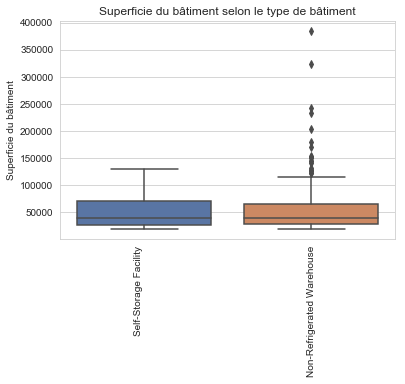

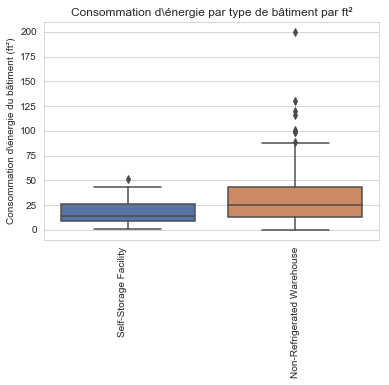

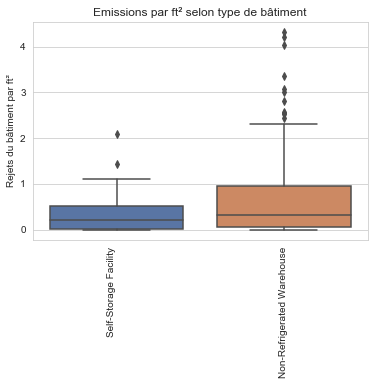

In [31]:
# Comportement de Non-Refrigerated Warehouse et Self-Storage Facility
comparaison('Non-Refrigerated Warehouse', 'Self-Storage Facility\n')


Les valeurs sont dans les mêmes mesures entre Self-storage Facility et Non-Refrigerated Warehouse. On les regroupe

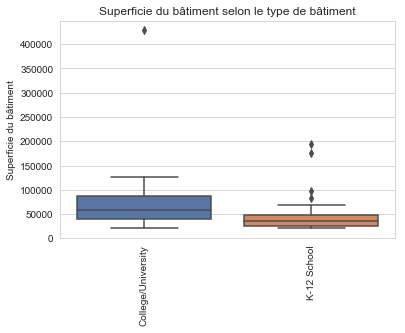

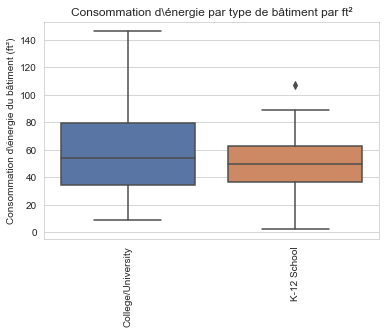

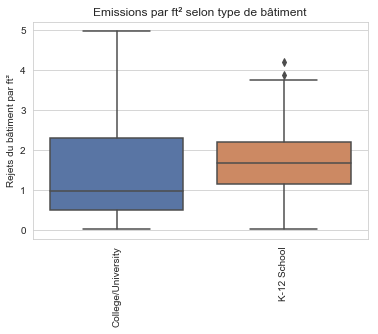

In [32]:
comparaison('K-12 School', 'College/University')

Les valeurs sont dans les mêmes mesures. On les regroupe.

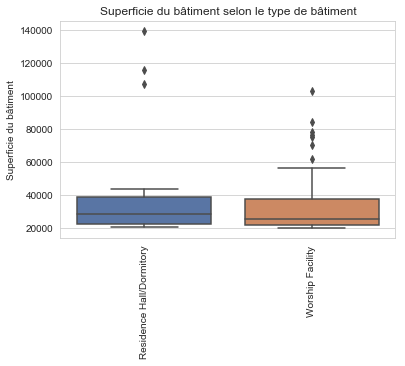

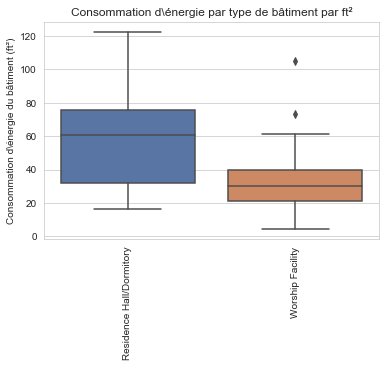

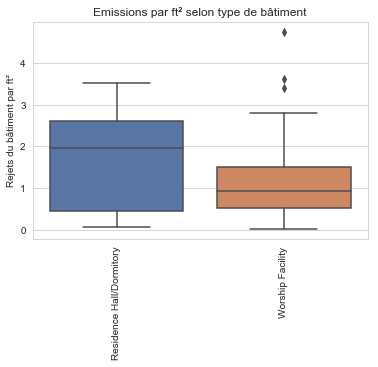

In [33]:
comparaison('Worship Facility', 'Residence Hall/Dormitory')

Les valeurs sont dans les mêmes mesures. On les regroupe.

***

In [34]:
# Création d'une variable cleanée
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType']

# nettoyage
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('\n', '')
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('Laboratory', 'Medical Office')
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('Low-Rise Multifamily', 'Mixed Use Property')
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('Restaurant', 'Other')

# regroupement Self-Storage Facility et Non-Refrigerated Warehouse
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('Self-Storage Facility', 'Non-Refrigerated Warehouse')

# regroupement K-12 School et College/University
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('K-12 School', 'Schools-College-University')
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('College/University', 'Schools-College-University')

# regroupement Self-Storage Facility et Non-Refrigerated Warehouse
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('Worship Facility', 'Worship Facility-Residence Hall_Dormitory')
data['PrimaryPropertyType_clean'] = data['PrimaryPropertyType_clean'].str.replace('Residence Hall/Dormitory', 'Worship Facility-Residence Hall_Dormitory')

In [35]:
# Vérification
bat_par_type = data['PrimaryPropertyType_clean'].value_counts()
bat_par_type

Small- and Mid-Sized Office                  296
Other                                        253
Non-Refrigerated Warehouse                   215
Large Office                                 170
Mixed Use Property                           104
Retail Store                                 100
Worship Facility-Residence Hall_Dormitory     87
Hotel                                         73
Schools-College-University                    55
Distribution Center                           53
Medical Office                                44
Supermarket/Grocery Store                     36
Senior Care Community                         19
Refrigerated Warehouse                        13
Hospital                                      10
Name: PrimaryPropertyType_clean, dtype: int64

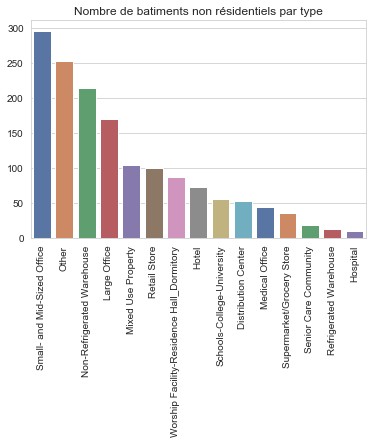

In [36]:
# Visualisation
sns.barplot(x=bat_par_type.index, y=bat_par_type, palette="deep")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.title('Nombre de batiments non résidentiels par type')
plt.ylabel('')
plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/batiments par type.png', dpi=200, bbox_inches='tight')
plt.show()

In [37]:
data.shape

(1528, 20)

<a class="anchor" id="PropertyName"></a>
***
### 5.4.2. PropertyName

In [38]:
# Compter le nombre de 'code' en doublon
data['PropertyName'].duplicated(keep=False).sum()

58

In [39]:
# Visualisation
data[data['PropertyName'].duplicated(keep=False)]

,PrimaryPropertyType,PropertyName,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean
OSEBuildingID,,,,,,,,,,,,,,,,,,,,
283,Small- and Mid-Sized Office,LAKE CITY CENTER,"{'latitude': '47.71892746', 'needs_recoding': ...",5,NORTH,1972,1,5.0,50759,0,50759,NaN,63.0,60.0,3045139.0,43.78,0.65,Compliant,NaN,Small- and Mid-Sized Office
323,Small- and Mid-Sized Office,GRANGE OFFICE PLAZA,"{'latitude': '47.61698381', 'needs_recoding': ...",7,DOWNTOWN,1981,1,4.0,79678,17570,62108,NaN,59.0,77.8,4829951.0,61.62,0.55,Compliant,NaN,Small- and Mid-Sized Office
497,Non-Refrigerated Warehouse,SHURGARD STORAGE,"{'latitude': '47.56885038', 'needs_recoding': ...",1,SOUTHWEST,1997,1,4.0,98475,0,98475,NaN,81.0,11.0,1082531.0,21.38,0.18,Compliant,NaN,Non-Refrigerated Warehouse
546,Non-Refrigerated Warehouse,NW CORPORATE PARK,"{'latitude': '47.54851596', 'needs_recoding': ...",2,GREATER DUWAMISH,1966,1,1.0,85400,0,85400,NaN,47.0,18.7,1593187.0,11.11,0.05,Compliant,NaN,Non-Refrigerated Warehouse
547,Non-Refrigerated Warehouse,NW CORPORATE PARK,"{'latitude': '47.54851596', 'needs_recoding': ...",2,GREATER DUWAMISH,1966,1,1.0,55700,0,55700,NaN,62.0,9.6,533078.0,3.72,0.03,Compliant,NaN,Non-Refrigerated Warehouse
550,Non-Refrigerated Warehouse,PUBLIC STORAGE,"{'latitude': '47.71285067', 'needs_recoding': ...",5,NORTHWEST,1986,1,3.0,64660,0,64660,NaN,88.0,5.3,340270.0,6.58,0.09,Compliant,NaN,Non-Refrigerated Warehouse
673,Retail Store,HOME DEPOT,"{'latitude': '47.53641069', 'needs_recoding': ...",1,DELRIDGE,2005,1,1.0,94713,0,94713,NaN,79.0,47.7,5230553.0,84.18,0.70,Compliant,NaN,Retail Store
681,Large Office,OFFICE BUILDING,"{'latitude': '47.63380792', 'needs_recoding': ...",7,MAGNOLIA / QUEEN ANNE,2000,1,4.0,191146,94892,96254,NaN,93.0,48.9,5032796.0,35.09,0.07,Compliant,NaN,Large Office
731,Mixed Use Property,SALVATION ARMY,"{'latitude': '47.59424167', 'needs_recoding': ...",2,GREATER DUWAMISH,1930,1,2.0,108753,18860,89893,NaN,NaN,33.7,3660395.0,25.52,0.09,Compliant,NaN,Mixed Use Property


N'est pas une clef primaire. Il n'y a pas d'erreurs il s'agit bien de différents batiments mais qui ont le meme nom.

<a class="anchor" id="location"></a>
***
### 5.4.3. Location

In [40]:
# visualisation des valeurs de la variable
data['Location'].value_counts()

{'latitude': '47.66375728', 'needs_recoding': False, 'human_address': '{"address":"2623 NE UNIVERSITY VILLAGE ST","city":"SEATTLE","state":"WA","zip":"98105"}', 'longitude': '-122.3002168'}         5
{'latitude': '47.52593209', 'needs_recoding': False, 'human_address': '{"address":"309 S CLOVERDALE ST","city":"SEATTLE","state":"WA","zip":"98108"}', 'longitude': '-122.3308402'}                   5
{'latitude': '47.52131741', 'needs_recoding': False, 'human_address': '{"address":"2600 SW BARTON ST","city":"SEATTLE","state":"WA","zip":"98126"}', 'longitude': '-122.3668974'}                     4
{'latitude': '47.5829049', 'needs_recoding': False, 'human_address': '{"address":"2203 AIRPORT WAY S","city":"SEATTLE","state":"WA","zip":"98134"}', 'longitude': '-122.3228994'}                     4
{'latitude': '47.62124083', 'needs_recoding': False, 'human_address': '{"address":"305 HARRISON ST","city":"SEATTLE","state":"WA","zip":"98109"}', 'longitude': '-122.3534322'}                       3


Il s'agit d'un dictionnaire que l'on va essayer de segmenter

In [41]:
# Splitter le dictionnaire en plusieurs colonnes
# Source : https://stackoverflow.com/questions/38231591/splitting-dictionary-list-inside-a-pandas-column-into-separate-columns
# data['Location'].apply(pd.Series)

# Ne fonctionne pas dans notre cas...

In [42]:
# Splittons par rapport aux ","
location = data['Location'].str.split(",", expand=True)
location.head()

,0,1,2,3,4,5,6
OSEBuildingID,,,,,,,
1,{'latitude': '47.61219025','needs_recoding': False,"'human_address': '{""address"":""405 OLIVE WAY""","""city"":""SEATTLE""","""state"":""WA""","""zip"":""98101""}'",'longitude': '-122.33799744'}
2,{'latitude': '47.61310583','needs_recoding': False,"'human_address': '{""address"":""724 PINE ST""","""city"":""SEATTLE""","""state"":""WA""","""zip"":""98101""}'",'longitude': '-122.33335756'}
3,{'latitude': '47.61334897','needs_recoding': False,"'human_address': '{""address"":""1900 5TH AVE""","""city"":""SEATTLE""","""state"":""WA""","""zip"":""98101""}'",'longitude': '-122.33769944'}
5,{'latitude': '47.61421585','needs_recoding': False,"'human_address': '{""address"":""620 STEWART ST""","""city"":""SEATTLE""","""state"":""WA""","""zip"":""98101""}'",'longitude': '-122.33660889'}
8,{'latitude': '47.6137544','needs_recoding': False,"'human_address': '{""address"":""401 LENORA ST""","""city"":""SEATTLE""","""state"":""WA""","""zip"":""98121""}'",'longitude': '-122.3409238'}


In [43]:
location.shape

(1528, 7)

In [44]:
# On ne garde que le éléments que nous souhaitons
location = location[[0,2,6]]
location.columns = ['Latitude', 'Address', 'Longitude']

In [45]:
location.head()

,Latitude,Address,Longitude
OSEBuildingID,,,
1,{'latitude': '47.61219025',"'human_address': '{""address"":""405 OLIVE WAY""",'longitude': '-122.33799744'}
2,{'latitude': '47.61310583',"'human_address': '{""address"":""724 PINE ST""",'longitude': '-122.33335756'}
3,{'latitude': '47.61334897',"'human_address': '{""address"":""1900 5TH AVE""",'longitude': '-122.33769944'}
5,{'latitude': '47.61421585',"'human_address': '{""address"":""620 STEWART ST""",'longitude': '-122.33660889'}
8,{'latitude': '47.6137544',"'human_address': '{""address"":""401 LENORA ST""",'longitude': '-122.3409238'}


In [46]:
# nettoyage
for variable in location.columns:   
    location[variable] = location[variable].str.replace('{', '')
    location[variable] = location[variable].str.replace('}', '')
    location[variable] = location[variable].str.replace('\'', '')
    location[variable] = location[variable].str.replace(':', '')
    location[variable] = location[variable].str.replace('\'', '')
    location[variable] = location[variable].str.replace('_', '')
    location[variable] = location[variable].str.replace('"', '')
    # Suppression des minuscules
    location[variable] = location[variable].str.replace('[a-z]','')                                             
    location[variable] = location[variable].str.replace('\'', '')   

In [47]:
# Visualisation des data types
location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 1 to 50038
Data columns (total 3 columns):
Latitude     1528 non-null object
Address      1528 non-null object
Longitude    1528 non-null object
dtypes: object(3)
memory usage: 47.8+ KB


In [48]:
# Convert to float
location['Latitude'] = location['Latitude'].astype(float)
location['Longitude'] = location['Longitude'].astype(float)

In [49]:
# Verification
location.head()

,Latitude,Address,Longitude
OSEBuildingID,,,
1,47.612190,405 OLIVE WAY,-122.337997
2,47.613106,724 PINE ST,-122.333358
3,47.613349,1900 5TH AVE,-122.337699
5,47.614216,620 STEWART ST,-122.336609
8,47.613754,401 LENORA ST,-122.340924


In [50]:
location.shape

(1528, 3)

***

In [51]:
# Ajoutons les données de localisation a data
data['Latitude'] = location['Latitude']
data['Longitude'] = location['Longitude']
data['Address'] = location['Address']

In [52]:
# Suppression de la colonne initiale 'Location'
data.drop(['Location'], axis=1, inplace=True)

In [53]:
data['Address'] = data['Address'].str.strip()

In [54]:
# Vérification
data.head()

,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,Hotel,MAYFLOWER PARK HOTEL,7,DOWNTOWN,1927,1,12.0,88434,0,88434,...,78.9,6981428.0,249.43,2.64,Compliant,NaN,Hotel,47.612190,-122.337997,405 OLIVE WAY
2,Hotel,PARAMOUNT HOTEL,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,...,94.4,8354235.0,263.51,2.38,Compliant,NaN,Hotel,47.613106,-122.333358,724 PINE ST
3,Hotel,WESTIN HOTEL,7,DOWNTOWN,1969,1,41.0,961990,0,961990,...,96.6,73130656.0,2061.48,1.92,Compliant,NaN,Hotel,47.613349,-122.337699,1900 5TH AVE
5,Hotel,HOTEL MAX,7,DOWNTOWN,1926,1,10.0,61320,0,61320,...,460.4,28229320.0,1936.34,31.38,Compliant,High Outlier,Hotel,47.614216,-122.336609,620 STEWART ST
8,Hotel,WARWICK SEATTLE HOTEL,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,...,120.1,14829099.0,507.70,4.02,Compliant,NaN,Hotel,47.613754,-122.340924,401 LENORA ST


In [55]:
data.shape

(1528, 22)

***

***

<a class="anchor" id="CouncilDistrictCode"></a>
***
### 5.4.4. CouncilDistrictCode

In [56]:
# visualisation des valeurs de la variable
data['CouncilDistrictCode'].value_counts()

7    517
2    367
3    183
4    147
5    117
6    100
1     97
Name: CouncilDistrictCode, dtype: int64

La ville de Seattle est découpée en 7 districts

![Image of Seattle Council Districts](https://www.seattle.gov/Images/Departments/Neighborhoods/Districts/Council-District-Map.jpg)

<a class="anchor" id="Neighborhood"></a>
***
### 5.4.5. Neighborhood

In [57]:
# visualisation des valeurs de la variable
data['Neighborhood'].value_counts()

DOWNTOWN                 361
GREATER DUWAMISH         324
LAKE UNION               141
MAGNOLIA / QUEEN ANNE    140
EAST                     115
NORTHEAST                106
NORTHWEST                 77
BALLARD                   61
NORTH                     57
CENTRAL                   44
DELRIDGE                  37
SOUTHWEST                 33
SOUTHEAST                 32
Name: Neighborhood, dtype: int64

![Image of Seattle Neighborhoods](https://i.pinimg.com/originals/7c/ff/82/7cff820ca0528814d012647beec14d56.gif)

In [58]:
# Table croisée entre Neighborhood et CouncilDistrictCode
pd.crosstab(data['Neighborhood'], data['CouncilDistrictCode'])

CouncilDistrictCode,1,2,3,4,5,6,7
Neighborhood,,,,,,,
BALLARD,0,0,0,0,0,61,0
CENTRAL,0,0,44,0,0,0,0
DELRIDGE,37,0,0,0,0,0,0
DOWNTOWN,0,44,11,0,0,0,306
EAST,0,1,107,0,0,0,7
GREATER DUWAMISH,27,294,3,0,0,0,0
LAKE UNION,0,0,13,43,0,21,64
MAGNOLIA / QUEEN ANNE,0,0,0,0,0,0,140
NORTH,0,0,0,2,55,0,0


Il y a 13 quartiers au sein de Seattle. C'est un découpage plus fin que les districts vus plus haut.
C'est la variable que nous garderons entre les deux

In [59]:
# Suppression de la colonne CouncilDistrictCode
data.drop(['CouncilDistrictCode'], axis=1, inplace=True)
data.head()

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,...,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,1927,1,12.0,88434,0,88434,NaN,...,78.9,6981428.0,249.43,2.64,Compliant,NaN,Hotel,47.612190,-122.337997,405 OLIVE WAY
2,Hotel,PARAMOUNT HOTEL,DOWNTOWN,1996,1,11.0,103566,15064,88502,NaN,...,94.4,8354235.0,263.51,2.38,Compliant,NaN,Hotel,47.613106,-122.333358,724 PINE ST
3,Hotel,WESTIN HOTEL,DOWNTOWN,1969,1,41.0,961990,0,961990,NaN,...,96.6,73130656.0,2061.48,1.92,Compliant,NaN,Hotel,47.613349,-122.337699,1900 5TH AVE
5,Hotel,HOTEL MAX,DOWNTOWN,1926,1,10.0,61320,0,61320,NaN,...,460.4,28229320.0,1936.34,31.38,Compliant,High Outlier,Hotel,47.614216,-122.336609,620 STEWART ST
8,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,1980,1,18.0,119890,12460,107430,NaN,...,120.1,14829099.0,507.70,4.02,Compliant,NaN,Hotel,47.613754,-122.340924,401 LENORA ST


<a class="anchor" id="YearBuilt"></a>
***
### 5.4.6. YearBuilt

In [60]:
# visualisation des valeurs de la variable
bat_per_year = data['YearBuilt'].value_counts(sort=False)
bat_per_year.head()

1900    45
1901     2
1902     9
1903     3
1904    13
Name: YearBuilt, dtype: int64

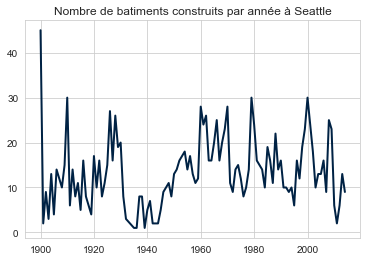

In [61]:
# Visualisation
sns.lineplot(data=bat_per_year,  linewidth=2, color=seahawks_blue)

plt.title('Nombre de batiments construits par année à Seattle')
plt.xlabel('')
plt.ylabel('')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/batiments par année.png', dpi=200, bbox_inches='tight')
plt.show()

Il est étonnant de retrouver 45 immeubles construits en 1900 (2 en 1901, 9 en 1902...).
Il faudrait comparer avec cette source : https://web6.seattle.gov/DPD/HistoricalSite/QueryResults.aspx?QRY=ATTR&YEBUS=1900&YEBUE=1900&ST=&NE=&AR=

***

In [62]:
# Liste des batiments de 1900 dans le data source
buildings_1900_from_data = data.loc[data['YearBuilt']==1900]
buildings_1900_from_data

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,...,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
53,Small- and Mid-Sized Office,EL CENTRO DE LA RAZA,GREATER DUWAMISH,1900,1,2.0,52554,0,52554,NaN,...,36.3,2137686.0,56.97,0.98,Compliant,NaN,Small- and Mid-Sized Office,47.580029,-122.311813,2524 16TH AVE S
233,Other,ARMORY BUILDING (MOHAI),LAKE UNION,1900,1,1.0,58000,0,58000,NaN,...,170.7,7338511.0,221.62,3.55,Compliant,NaN,Other,47.627594,-122.336609,860 TERRY AVE N
244,Small- and Mid-Sized Office,WASHINGTON PARK BUILDING,DOWNTOWN,1900,1,3.0,56456,0,56456,NaN,...,34.3,1527917.0,26.55,0.38,Compliant,NaN,Small- and Mid-Sized Office,47.601058,-122.335182,68 S WASHINGTON ST
318,Other,PIER 54 IVARS ACRES OF CLAMS,DOWNTOWN,1900,1,1.0,62900,0,62900,NaN,...,96.1,6366808.0,211.01,3.17,Compliant,NaN,Other,47.604119,-122.339602,1003 ALASKAN WAY
339,Small- and Mid-Sized Office,BRODERICK BUILDING,DOWNTOWN,1900,1,7.0,89550,0,89550,NaN,...,50.3,4112006.0,50.60,0.38,Compliant,NaN,Small- and Mid-Sized Office,47.602608,-122.333009,615 2ND AVE
340,Small- and Mid-Sized Office,PIONEER BUILDING,DOWNTOWN,1900,1,6.0,89355,0,89355,NaN,...,53.1,4742636.0,37.14,0.19,Compliant,NaN,Small- and Mid-Sized Office,47.601887,-122.334101,600 1ST AVE
382,Small- and Mid-Sized Office,COLLINS BUILDING,DOWNTOWN,1900,1,5.0,50176,0,50176,NaN,...,72.8,3033340.0,21.15,0.16,Compliant,NaN,Small- and Mid-Sized Office,47.602280,-122.332024,520 2ND AVE
612,Small- and Mid-Sized Office,GLOBE BUILDING,DOWNTOWN,1900,1,4.0,75007,0,75007,NaN,...,33.0,2003759.0,64.67,0.79,Compliant,NaN,Small- and Mid-Sized Office,47.599706,-122.333785,105 S MAIN ST
613,Small- and Mid-Sized Office,GRAND CENTRAL BUILDING,DOWNTOWN,1900,1,4.0,84750,0,84750,NaN,...,34.0,2392466.0,31.89,0.27,Compliant,NaN,Small- and Mid-Sized Office,47.600463,-122.333787,216 1ST AVE S


In [63]:
# Rapprochement par le nom
buildings_1900_from_data.merge(buildings_1900, left_on='PropertyName', right_on='Common Name')

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,...,GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address_x,Address_y,Historic Name,Common Name
0,Mixed Use Property,PIER 56,DOWNTOWN,1900,1,2.0,34455,0,34455,NaN,...,0.36,Compliant,NaN,Mixed Use Property,47.604558,-122.339397,1201 ALASKAN WAY,1201 ALASKAN WAY,Pier 5,PIER 56
1,Small- and Mid-Sized Office,DUNCAN BUILDING,DOWNTOWN,1900,1,3.0,38675,0,38675,NaN,...,0.89,Compliant,NaN,Small- and Mid-Sized Office,47.599621,-122.331978,315 2ND AVE S,315 2ND AVE,Duncan and Sons Building/ Duncan and Sons Sadd...,DUNCAN BUILDING


2 noms "matchent"

In [64]:
# Rapprochement par l'adresse
buildings_1900_from_data.merge(buildings_1900, left_on='Address', right_on='Address')

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,...,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Historic Name,Common Name
0,Other,PIER 54 IVARS ACRES OF CLAMS,DOWNTOWN,1900,1,1.0,62900,0,62900,NaN,...,211.01,3.17,Compliant,NaN,Other,47.604119,-122.339602,1003 ALASKAN WAY,Pier 3,PIER 54
1,Non-Refrigerated Warehouse,MEAVES BUILDING,DOWNTOWN,1900,1,5.0,33300,0,33300,NaN,...,0.92,0.01,Compliant,NaN,Non-Refrigerated Warehouse,47.604853,-122.336129,1012 1ST AVE,Schoenfeld Furniture Store Building,NaN
2,Mixed Use Property,PIER 56,DOWNTOWN,1900,1,2.0,34455,0,34455,NaN,...,32.77,0.36,Compliant,NaN,Mixed Use Property,47.604558,-122.339397,1201 ALASKAN WAY,Pier 5,PIER 56
3,Small- and Mid-Sized Office,PIER 55,DOWNTOWN,1900,1,2.0,32027,0,32027,NaN,...,103.40,3.04,Compliant,NaN,Small- and Mid-Sized Office,47.604558,-122.339397,1201 ALASKAN WAY,Pier 5,PIER 56


4 adresses seulement "matchent".
Les adresses dans le data source sont composées parfois de N et de S à la fin ce qui est propre à la ville de Seattle. Mais on ne les retrouve pas dans le listing officiel de Seattle.

En regardant "à la main" beaucoup de batiments datent d'avant 1900 ou n'ont pas de dates de construction que l'on peut trouver dans le registre de la ville qui ne tient en référence que les batiments historiques.

On ne va pas plus loin dans le nettoyage.

In [65]:
# Création d'une nouvelle variable "age_batiment"

# Récupération de la date en cours
from datetime import datetime
currentYear = datetime.now().year

# Création de la variable
data['Age_batiment'] = currentYear - data['YearBuilt']

# Vérification
data.head()

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,1927,1,12.0,88434,0,88434,NaN,...,6981428.0,249.43,2.64,Compliant,NaN,Hotel,47.612190,-122.337997,405 OLIVE WAY,92
2,Hotel,PARAMOUNT HOTEL,DOWNTOWN,1996,1,11.0,103566,15064,88502,NaN,...,8354235.0,263.51,2.38,Compliant,NaN,Hotel,47.613106,-122.333358,724 PINE ST,23
3,Hotel,WESTIN HOTEL,DOWNTOWN,1969,1,41.0,961990,0,961990,NaN,...,73130656.0,2061.48,1.92,Compliant,NaN,Hotel,47.613349,-122.337699,1900 5TH AVE,50
5,Hotel,HOTEL MAX,DOWNTOWN,1926,1,10.0,61320,0,61320,NaN,...,28229320.0,1936.34,31.38,Compliant,High Outlier,Hotel,47.614216,-122.336609,620 STEWART ST,93
8,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,1980,1,18.0,119890,12460,107430,NaN,...,14829099.0,507.70,4.02,Compliant,NaN,Hotel,47.613754,-122.340924,401 LENORA ST,39


<a class="anchor" id="NumberofBuildings"></a>
***
### 5.4.7. NumberofBuildings

In [66]:
# visualisation des valeurs de la variable
data['NumberofBuildings'].value_counts(sort=False)

1    1523
2       1
3       1
6       1
7       2
Name: NumberofBuildings, dtype: int64

Le nombre de buildings par "adresse" n'est pas une variable suffisament variée. Nous l'enlevons de l'étude

In [67]:
# Suppression de la colonne NumberofBuildings
data.drop(['NumberofBuildings'], axis=1, inplace=True)
data.head()

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,1927,12.0,88434,0,88434,NaN,65.0,...,6981428.0,249.43,2.64,Compliant,NaN,Hotel,47.612190,-122.337997,405 OLIVE WAY,92
2,Hotel,PARAMOUNT HOTEL,DOWNTOWN,1996,11.0,103566,15064,88502,NaN,51.0,...,8354235.0,263.51,2.38,Compliant,NaN,Hotel,47.613106,-122.333358,724 PINE ST,23
3,Hotel,WESTIN HOTEL,DOWNTOWN,1969,41.0,961990,0,961990,NaN,18.0,...,73130656.0,2061.48,1.92,Compliant,NaN,Hotel,47.613349,-122.337699,1900 5TH AVE,50
5,Hotel,HOTEL MAX,DOWNTOWN,1926,10.0,61320,0,61320,NaN,1.0,...,28229320.0,1936.34,31.38,Compliant,High Outlier,Hotel,47.614216,-122.336609,620 STEWART ST,93
8,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,1980,18.0,119890,12460,107430,NaN,67.0,...,14829099.0,507.70,4.02,Compliant,NaN,Hotel,47.613754,-122.340924,401 LENORA ST,39


<a class="anchor" id="NumberofFloors"></a>
***
### 5.4.8. NumberofFloors

Le calcul du nombre d'étages aux USA est différent qu'en Europe. Le RDC est le niveau 1

https://en.wikipedia.org/wiki/Storey

In [68]:
# visualisation des valeurs de la variable
data.groupby(['NumberofFloors']).count()['PrimaryPropertyType'].head()

NumberofFloors
0.0      5
1.0    413
2.0    353
3.0    246
4.0    143
Name: PrimaryPropertyType, dtype: int64

In [69]:
# visualisation des valeurs de la variable
data.groupby(['NumberofFloors']).count()['PrimaryPropertyType'].tail()

NumberofFloors
55.0    1
56.0    1
63.0    1
76.0    1
99.0    1
Name: PrimaryPropertyType, dtype: int64

***

In [70]:
# Identificaion du batiment avec 99 etages
data.loc[data['NumberofFloors'] == 99]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
21611,Worship Facility,CHINESE BAPTIST CHURCH,GREATER DUWAMISH,1977,99.0,21948,0,21948,NaN,54.0,...,318205.0,2.22,0.04,Compliant,NaN,Worship Facility-Residence Hall_Dormitory,47.550571,-122.302943,5801 BEACON AVE S,42


Il s'agit d'une église chinoise [église chinoise](https://www.yelp.com/biz/chinese-baptist-church-seattle) avec un seul étage

In [71]:
# Modification du nb d'étage
data.loc[data['PropertyName'] == 'CHINESE BAPTIST CHURCH', 'NumberofFloors'] = 1

***

In [72]:
# Identificaion des batiments avec 0 etage
data.loc[data['NumberofFloors'] == 0]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
267,Hotel,PINE ST. CONDO-ELLIOTT GRAND HYATT SEATTLE,DOWNTOWN,1999,0.0,934292,0,934292,NaN,NaN,...,63811044.0,1558.85,1.49,Compliant,NaN,Hotel,47.612677,-122.333932,721 PINE ST,20
656,Medical Office,1221 MADISON STREET (FORMER ARNOLD MED. PAVILLON),EAST,2004,0.0,225982,0,225982,NaN,61.0,...,18558162.0,604.45,2.45,Compliant,NaN,Medical Office,47.609680,-122.323105,1221 MADISON ST,15
657,Mixed Use Property,2200 WESTLAKE,DOWNTOWN,2006,0.0,516407,0,516407,NaN,19.0,...,48981052.0,1222.69,2.12,Compliant,NaN,Mixed Use Property,47.617939,-122.337387,2200 WESTLAKE AVE,13
758,Other,PACIFIC PLACE,DOWNTOWN,1999,0.0,947987,440185,507802,NaN,NaN,...,48143224.0,335.63,0.14,Compliant,NaN,Other,47.612874,-122.335276,600 PINE ST,20
23311,Other,FIRST HILL MEDICAL PAVILLION,EAST,1945,0.0,274568,0,274568,NaN,NaN,...,25246386.0,1114.43,3.87,Compliant,NaN,Other,47.608305,-122.323350,1124 COLUMBIA ST,74


In [73]:
# Modification du nb d'étage aprèes recherche manuelle rapide

# https://www.travelweekly.com/Hotels/Seattle/Grand-Hyatt-Seattle-p3759162
data.loc[data['PropertyName'] == 'PINE ST. CONDO-ELLIOTT GRAND HYATT SEATTLE', 'NumberofFloors'] = 30

# Via google map
data.loc[data['PropertyName'] == '1221 MADISON STREET (FORMER ARNOLD MED. PAVILLON)', 'NumberofFloors'] = 14
data.loc[data['PropertyName'] == '2200 WESTLAKE', 'NumberofFloors'] = 3
data.loc[data['PropertyName'] == 'PACIFIC PLACE', 'NumberofFloors'] = 6
data.loc[data['PropertyName'] == 'FIRST HILL MEDICAL PAVILLION', 'NumberofFloors'] = 7

***

In [74]:
# Vérification du plus haut batiment
data.loc[data['NumberofFloors'] == data['NumberofFloors'].max()]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
775,Large Office,COLUMBIA CENTER,DOWNTOWN,1985,76.0,1952220,319400,1632820,"2016, 2015, 2012, 2009, 2007, 2006",84.0,...,94560088.0,834.96,0.23,Compliant,NaN,Large Office,47.60466,-122.330286,701 5TH AVE,34


Il s'agit bien du Colombia Center qui a 76 étages
https://fr.wikipedia.org/wiki/Columbia_Center

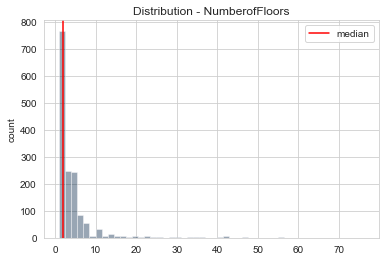

In [75]:
# Distribution de la variable
sns.distplot(data['NumberofFloors'], kde=False, color=seahawks_blue)
plt.axvline(data['NumberofFloors'].median(), color='red', linestyle='-', label='median')

plt.title('Distribution - NumberofFloors')
plt.xlabel('')
plt.ylabel('count')
plt.legend()

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/number of floors.png', dpi=200, bbox_inches='tight')
plt.show()

In [76]:
data['NumberofFloors'].median()

2.0

<a class="anchor" id="PropertyGFATotal"></a>
***
### 5.4.9. PropertyGFATotal

In [77]:
data['PropertyGFATotal'].median()

47302.5

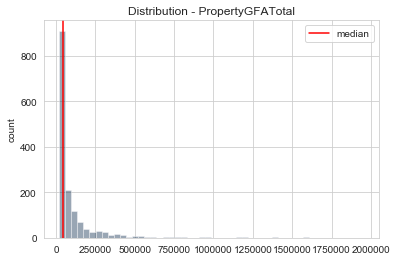

In [78]:
# Distribution de la variable
sns.distplot(data['PropertyGFATotal'], kde=False, color=seahawks_blue)
plt.axvline(data['PropertyGFATotal'].median(), color='red', linestyle='-', label='median')

plt.title('Distribution - PropertyGFATotal')
plt.xlabel('')
plt.ylabel('count')
plt.legend()

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/surface totale.png', dpi=200, bbox_inches='tight')
plt.show()

In [79]:
# Visualisation des batiments avec la plus grande surface
data.sort_values(by='PropertyGFATotal', ascending=False)

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
775,Large Office,COLUMBIA CENTER,DOWNTOWN,1985,76.0,1952220,319400,1632820,"2016, 2015, 2012, 2009, 2007, 2006",84.0,...,94560088.0,834.96,0.23,Compliant,NaN,Large Office,47.604660,-122.330286,701 5TH AVE,34
828,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,EAST,1994,14.0,1765970,0,1765970,NaN,59.0,...,286685536.0,11824.89,6.35,Compliant,NaN,Hospital,47.608951,-122.322402,747 BROADWAY,25
422,Large Office,TWO UNION SQUARE,DOWNTOWN,1989,56.0,1605578,389860,1215718,"2009, 2005",97.0,...,48342560.0,496.99,0.19,Compliant,NaN,Large Office,47.610014,-122.332394,601 UNION ST,30
659,Large Office,RUSSELL INVESTMENTS CENTER,DOWNTOWN,2005,42.0,1592914,297457,1295457,"2016, 2014, 2012, 2011, 2008, 2007",96.0,...,58041572.0,500.93,0.16,Compliant,NaN,Large Office,47.607616,-122.338131,1301 2ND AVE,14
245,Other,CENTURYLINK FIELD-Stadium,GREATER DUWAMISH,1999,6.0,1585960,327680,1258280,NaN,NaN,...,59991984.0,834.11,0.39,Compliant,NaN,Other,47.594354,-122.330179,800 OCCIDENTAL AVE S,20
402,Large Office,US BANK CENTRE,DOWNTOWN,1989,46.0,1536606,512608,1023998,"2017, 2016, 2014, 2013, 2012, 2011, 2010, 2009...",90.0,...,55813996.0,530.70,0.20,Compliant,NaN,Large Office,47.610480,-122.334542,1420 5TH AVE,30
399,Large Office,WASH MUTUAL TOWER (1201 THIRD AVE),DOWNTOWN,1988,55.0,1400000,285000,1115000,"2017, 2011, 2010, 2007",94.0,...,51625548.0,569.61,0.26,Compliant,NaN,Large Office,47.607223,-122.336153,1201 3RD AVE,31
435,Other,WASHINGTON STATE CONVENTION CENTER,DOWNTOWN,1990,6.0,1400000,0,1400000,NaN,NaN,...,77164568.0,1793.90,1.10,Compliant,NaN,Other,47.611586,-122.331601,800 CONVENTION PL,29
640,Large Office,STARBUCKS (SODO) CENTER,GREATER DUWAMISH,1912,6.0,1380959,0,1380959,NaN,77.0,...,78272488.0,953.12,0.47,Compliant,NaN,Large Office,47.581334,-122.335768,2401 UTAH AVE S,107


In [80]:
# Vérification du batiment avec la surface la plus grande
data.loc[data['PropertyGFATotal'] == data['PropertyGFATotal'].max()]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
775,Large Office,COLUMBIA CENTER,DOWNTOWN,1985,76.0,1952220,319400,1632820,"2016, 2015, 2012, 2009, 2007, 2006",84.0,...,94560088.0,834.96,0.23,Compliant,NaN,Large Office,47.60466,-122.330286,701 5TH AVE,34


RAS

<a class="anchor" id="PropertyGFAParking_PropertyGFABuilding"></a>
***
### 5.4.10. PropertyGFAParking and PropertyGFABuilding(s)	

In [81]:
# Vérification si un batiment n'a pas de surface en 'surface'
data.loc[data['PropertyGFABuilding(s)'] == 0]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,


RAS

In [82]:
# Vérifions si : PropertyGFABuilding(s) + PropertyGFAParking = PropertyGFATotal
data[data['PropertyGFABuilding(s)'] + data['PropertyGFAParking'] != data['PropertyGFATotal']]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,


RAS

<a class="anchor" id="YearsENERGYSTARCertified"></a>
***
### 5.4.11. YearsENERGYSTARCertified

In [83]:
# visualisation des valeurs de la variable
data['YearsENERGYSTARCertified'].value_counts(sort=False).head(10)

2011                                                    2
2016, 2015                                              6
2012, 2010, 2007, 2006                                  1
2012, 2010                                              1
2014, 2013, 2011, 2010, 2009, 2008, 2007                1
2016, 2015, 2013, 2012, 2011, 2010, 2009, 2008          1
2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008    1
2017, 2011, 2010, 2007                                  1
2016                                                    7
2014                                                    2
Name: YearsENERGYSTARCertified, dtype: int64

<a class="anchor" id="ENERGYSTARScore"></a>
***
### 5.4.12. ENERGYSTARScore

In [84]:
# visualisation des valeurs de la variable
data['ENERGYSTARScore'].value_counts(sort=False).head(10)

65.0    12
51.0    11
18.0     6
1.0     26
25.0     4
46.0     7
48.0    14
32.0     3
39.0     8
56.0     9
Name: ENERGYSTARScore, dtype: int64

In [85]:
data.loc[data['ENERGYSTARScore'].notnull()]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,1927,12.0,88434,0,88434,NaN,65.0,...,6981428.0,249.43,2.64,Compliant,NaN,Hotel,47.612190,-122.337997,405 OLIVE WAY,92
2,Hotel,PARAMOUNT HOTEL,DOWNTOWN,1996,11.0,103566,15064,88502,NaN,51.0,...,8354235.0,263.51,2.38,Compliant,NaN,Hotel,47.613106,-122.333358,724 PINE ST,23
3,Hotel,WESTIN HOTEL,DOWNTOWN,1969,41.0,961990,0,961990,NaN,18.0,...,73130656.0,2061.48,1.92,Compliant,NaN,Hotel,47.613349,-122.337699,1900 5TH AVE,50
5,Hotel,HOTEL MAX,DOWNTOWN,1926,10.0,61320,0,61320,NaN,1.0,...,28229320.0,1936.34,31.38,Compliant,High Outlier,Hotel,47.614216,-122.336609,620 STEWART ST,93
8,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,1980,18.0,119890,12460,107430,NaN,67.0,...,14829099.0,507.70,4.02,Compliant,NaN,Hotel,47.613754,-122.340924,401 LENORA ST,39
10,Hotel,CAMLIN WORLDMARK HOTEL,DOWNTOWN,1926,11.0,83008,0,83008,NaN,25.0,...,6252842.0,208.46,2.37,Compliant,NaN,Hotel,47.614114,-122.332741,1619 9TH AVE,93
12,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,DOWNTOWN,1904,15.0,163984,0,163984,NaN,46.0,...,12633744.0,331.61,1.83,Compliant,NaN,Hotel,47.602589,-122.332553,612 2ND AVE,115
15,Hotel,HOTEL MONACO,DOWNTOWN,1969,11.0,153163,19279,133884,NaN,48.0,...,14719853.0,576.63,3.59,Compliant,NaN,Hotel,47.607121,-122.334319,1101 4TH AVE,50
16,Hotel,W SEATTLE HOTEL,DOWNTOWN,1998,25.0,333176,61161,272015,NaN,32.0,...,27717026.0,723.40,1.93,Compliant,NaN,Hotel,47.607182,-122.333472,1112 4TH AVE,21


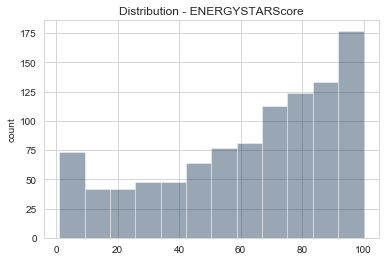

In [86]:
# Distribution de la variable
sns.distplot(data.loc[data['ENERGYSTARScore'].notnull()]['ENERGYSTARScore'], kde=False, color=seahawks_blue)
plt.title('Distribution - ENERGYSTARScore')
plt.xlabel('')
plt.ylabel('count')
plt.show()

In [87]:
data['ENERGYSTARScore'].min()

1.0

In [88]:
data['ENERGYSTARScore'].max()

100.0

<a class="anchor" id="variables_nrj_cO2"></a>
***
### 5.4.13. Variables sur l'énergie consommée et les rejets de C02

In [89]:
data.columns

Index(['PrimaryPropertyType', 'PropertyName', 'Neighborhood', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'ComplianceStatus', 'Outlier', 'PrimaryPropertyType_clean', 'Latitude',
       'Longitude', 'Address', 'Age_batiment'],
      dtype='object')

In [90]:
# Recherche des batiments sans informations dans ces données sur l'energie et les rejets en CO2
data.loc[(data['SiteEUI(kBtu/sf)']==0) & (data['SiteEnergyUse(kBtu)']==0) & (data['GHGEmissions(MetricTonsCO2e)']==0)  & (data['GHGEmissionsIntensity(kgCO2e/ft2)']==0)]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
58,Retail Store,CENTURY SQUARE RETAIL,DOWNTOWN,1920,2.0,57428,0,57428,NaN,NaN,...,0.0,0.0,0.0,Compliant,NaN,Retail Store,47.610764,-122.337677,1525 4TH AVE,99
765,Large Office,SEATTLE TOWER,DOWNTOWN,1929,27.0,216571,13320,203251,"2014, 2013, 2012, 2008",NaN,...,0.0,0.0,0.0,Compliant,NaN,Large Office,47.607655,-122.335512,1218 3RD AVE,90


In [91]:
# Suppression de ces 2 batiments
indexNames = data.loc[(data['SiteEUI(kBtu/sf)']==0) & (data['SiteEnergyUse(kBtu)']==0) & (data['GHGEmissions(MetricTonsCO2e)']==0)  & (data['GHGEmissionsIntensity(kgCO2e/ft2)']==0)].index
data.drop(indexNames , inplace=True)

In [92]:
# Vérification
data.shape

(1526, 21)

***

In [93]:
# Recherche des batiments avec des données <0 sur ces informations
data.loc[(data['SiteEUI(kBtu/sf)']<0) | (data['SiteEnergyUse(kBtu)']<0) | (data['GHGEmissions(MetricTonsCO2e)']<0) | (data['GHGEmissionsIntensity(kgCO2e/ft2)']<0)]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,


RAS

***

In [94]:
# Recherche de valeurs aberrantes
data[['SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']].describe()

,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,1526.000000,1.526000e+03,1526.000000,1526.000000
mean,72.751376,7.563822e+06,162.984240,1.357746
std,72.197258,1.854730e+07,557.601104,2.120459
min,0.200000,1.144100e+04,0.080000,0.000000
25%,33.100000,1.154168e+06,18.650000,0.160000
50%,53.100000,2.512737e+06,47.105000,0.640000
75%,83.875000,7.000964e+06,135.377500,1.640000
max,800.600000,2.958126e+08,11824.890000,31.380000


In [95]:
# Batiment qui consomme le plus par rapport a sa surface
data.loc[data['SiteEUI(kBtu/sf)'].idxmax()]

PrimaryPropertyType                            Mixed Use Property
PropertyName                         FISHER PLAZA - WEST BUILDING
Neighborhood                                           LAKE UNION
YearBuilt                                                    2001
NumberofFloors                                                  6
PropertyGFATotal                                           213834
PropertyGFAParking                                         104922
PropertyGFABuilding(s)                                     108912
YearsENERGYSTARCertified                                      NaN
ENERGYSTARScore                                               100
SiteEUI(kBtu/sf)                                            800.6
SiteEnergyUse(kBtu)                                   8.49808e+07
GHGEmissions(MetricTonsCO2e)                                599.2
GHGEmissionsIntensity(kgCO2e/ft2)                             1.1
ComplianceStatus                                        Compliant
Outlier   

In [96]:
# Affichage des 5 batiments qui consomment les plus par rapport a leur surface
data.sort_values(by='SiteEUI(kBtu/sf)', ascending=False).head(5)

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
440,Mixed Use Property,FISHER PLAZA - WEST BUILDING,LAKE UNION,2001,6.0,213834,104922,108912,NaN,100.0,...,84980760.0,599.20,1.10,Compliant,NaN,Mixed Use Property,47.618921,-122.348574,100 4TH AVE N,18
753,Other,THE WESTIN BUILDING,DOWNTOWN,1981,33.0,429405,0,429405,NaN,71.0,...,284867168.0,1992.96,1.79,Compliant,NaN,Other,47.614353,-122.338860,2001 6TH AVE,38
19900,Other,3000/3018 Western,DOWNTOWN,1926,4.0,49249,0,49249,NaN,NaN,...,29540052.0,1084.49,21.10,Compliant,NaN,Other,47.617209,-122.354645,3018 WESTERN AVE,93
19780,Other,AURORA CHRYSLER PLYMOUTH,NORTHWEST,1968,1.0,21633,0,21633,NaN,NaN,...,6293359.0,232.12,10.29,Compliant,NaN,Other,47.729694,-122.345432,13733 AURORA AVE N,51
49709,Other,NORTHWEST HOSPITAL & MEDICAL CENTER (NEW PROFE...,NORTHWEST,2012,2.0,53575,0,53575,NaN,NaN,...,29195468.0,595.67,9.46,Compliant,NaN,Other,47.712757,-122.336492,1570 N 115TH ST,7


Rien ne nous permet de dire qu'il y a des valeurs aberrantes

In [97]:
# Affichage des 5 batiments qui consomment le +
data.sort_values(by='SiteEnergyUse(kBtu)', ascending=False).head(5)

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
276,Hospital,HARBORVIEW MEDICAL CENTER,EAST,2000,8.0,1158691,0,1158691,NaN,30.0,...,295812640.0,10780.64,8.67,Compliant,NaN,Hospital,47.603871,-122.322700,325 9TH AVE,19
828,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,EAST,1994,14.0,1765970,0,1765970,NaN,59.0,...,286685536.0,11824.89,6.35,Compliant,NaN,Hospital,47.608951,-122.322402,747 BROADWAY,25
753,Other,THE WESTIN BUILDING,DOWNTOWN,1981,33.0,429405,0,429405,NaN,71.0,...,284867168.0,1992.96,1.79,Compliant,NaN,Other,47.614353,-122.338860,2001 6TH AVE,38
198,Hospital,SEATTLE CHILDREN'S HOSPITAL (MAIN CAMPUS),NORTHEAST,1953,10.0,879000,0,879000,NaN,13.0,...,251191824.0,8046.70,8.59,Compliant,NaN,Hospital,47.663567,-122.281383,4800 SAND POINT WAY NE,66
268,Hospital,SWEDISH MEDICAL CENTER CHERRY HILL CAMPUS,CENTRAL,1990,5.0,597519,0,597519,NaN,45.0,...,137635696.0,4725.43,7.51,Compliant,NaN,Hospital,47.607107,-122.310783,500 17TH AVE,29


Rien ne nous permet de dire qu'il y a des valeurs aberrantes

In [98]:
# Affichage des 5 batiments qui rejettent le + de C02
data.sort_values(by='GHGEmissions(MetricTonsCO2e)', ascending=False).head(5)

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
828,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,EAST,1994,14.0,1765970,0,1765970,NaN,59.0,...,286685536.0,11824.89,6.35,Compliant,NaN,Hospital,47.608951,-122.322402,747 BROADWAY,25
276,Hospital,HARBORVIEW MEDICAL CENTER,EAST,2000,8.0,1158691,0,1158691,NaN,30.0,...,295812640.0,10780.64,8.67,Compliant,NaN,Hospital,47.603871,-122.322700,325 9TH AVE,19
198,Hospital,SEATTLE CHILDREN'S HOSPITAL (MAIN CAMPUS),NORTHEAST,1953,10.0,879000,0,879000,NaN,13.0,...,251191824.0,8046.70,8.59,Compliant,NaN,Hospital,47.663567,-122.281383,4800 SAND POINT WAY NE,66
268,Hospital,SWEDISH MEDICAL CENTER CHERRY HILL CAMPUS,CENTRAL,1990,5.0,597519,0,597519,NaN,45.0,...,137635696.0,4725.43,7.51,Compliant,NaN,Hospital,47.607107,-122.310783,500 17TH AVE,29
49940,Hospital,VIRGINIA MASON- CENTRAL PAVILLION,EAST,1920,8.0,374466,0,374466,NaN,97.0,...,78652064.0,3894.01,10.04,Compliant,NaN,Hospital,47.609840,-122.327441,925 SENECA ST,99


Rien ne nous permet de dire qu'il y a des valeurs aberrantes

In [99]:
# Affichage des 5 batiments qui rejettent le + de C02
data.sort_values(by='GHGEmissionsIntensity(kgCO2e/ft2)', ascending=False).head(5)

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
5,Hotel,HOTEL MAX,DOWNTOWN,1926,10.0,61320,0,61320,NaN,1.0,...,28229320.0,1936.34,31.38,Compliant,High Outlier,Hotel,47.614216,-122.336609,620 STEWART ST,93
19900,Other,3000/3018 Western,DOWNTOWN,1926,4.0,49249,0,49249,NaN,NaN,...,29540052.0,1084.49,21.10,Compliant,NaN,Other,47.617209,-122.354645,3018 WESTERN AVE,93
21435,Other,SPACE NEEDLE,MAGNOLIA / QUEEN ANNE,1961,2.0,33971,0,33971,NaN,NaN,...,19061780.0,570.98,15.60,Compliant,NaN,Other,47.620485,-122.349304,400 BROAD ST,58
23503,Restaurant\n,SALTYS RESTAURANT,SOUTHWEST,1902,2.0,20398,0,20398,NaN,NaN,...,9085108.0,326.65,15.30,Compliant,NaN,Other,47.586680,-122.376815,1936 HARBOR AVE SW,117
45927,Other,RESEARCH AND TRAINING BUILDING (HARBORVIEW),EAST,2000,8.0,178000,0,178000,NaN,NaN,...,52412292.0,2452.86,13.23,Compliant,NaN,Other,47.603871,-122.322700,300 9TH AVE,19


Rien ne nous permet de dire qu'il y a des valeurs aberrantes

***

In [100]:
variables = ['SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']

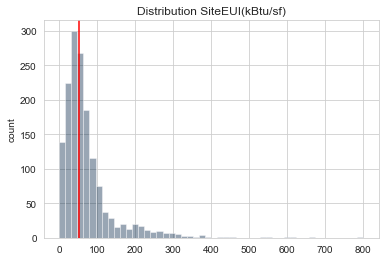

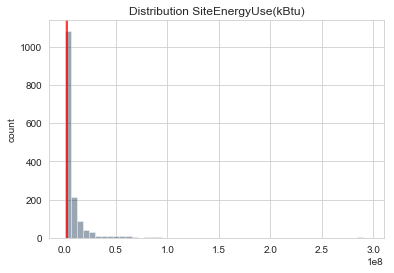

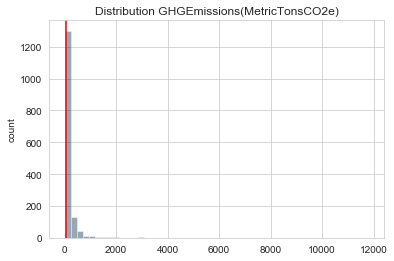

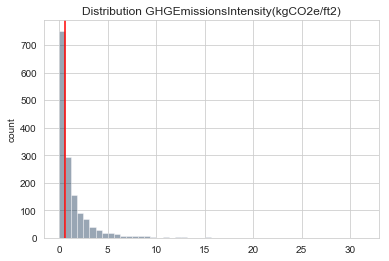

In [101]:
for variable in variables:
    # Distribution de la variable
    sns.distplot(data.loc[data[variable].notnull()][variable], kde=False, color=seahawks_blue)
    plt.axvline(data[variable].median(), color='red', linestyle='-', label='moyenne')

    plt.title('Distribution {}'.format(variable))
    plt.xlabel('')
    plt.ylabel('count')
    plt.show()

<a class="anchor" id="ComplianceStatus"></a>
***
### 5.4.14. ComplianceStatus

In [102]:
# visualisation des valeurs de la variable
data['ComplianceStatus'].value_counts()

Compliant    1526
Name: ComplianceStatus, dtype: int64

RAS

<a class="anchor" id="Outlier"></a>
***
### 5.4.15. Outlier

In [103]:
# visualisation des valeurs de la variable
data['Outlier'].value_counts()

Low Outlier     15
High Outlier    14
Name: Outlier, dtype: int64

In [104]:
data.loc[data['Outlier'].isnull(), 'Outlier'] = 'Not Outlier'

In [105]:
# visualisation des valeurs de la variable
data['Outlier'].value_counts()

Not Outlier     1497
Low Outlier       15
High Outlier      14
Name: Outlier, dtype: int64

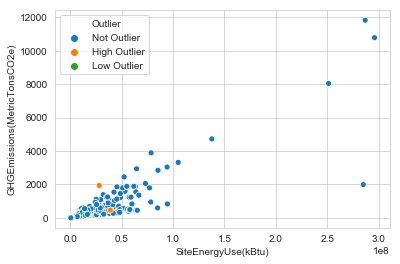

In [106]:
# identifions visuellement les outliers défini dans les données
sns.scatterplot(x="SiteEnergyUse(kBtu)", y='GHGEmissions(MetricTonsCO2e)', hue="Outlier", data=data)

Ces immeubles definis comme 'outliers' ne le sont pas au regard des deux variables cibles.

***

In [107]:
# Sauvegarde de la table data (pour exploitation dans Carto)
data.to_excel("data.xlsx")

<a class="anchor" id="outliers"></a>
***
## 5.5. Traitements des outliers avant modélisation

on retire des données les outliers qui 'faussent' les modélisations futures.
Visuellement on conclue que l'on peut retirer les immeubles qui ont :
- une *GHGEmissions(MetricTonsCO2e)* > 6000
- une *'SiteEnergyUse(kBtu)* > 150 000 000

In [108]:
# Création d'un nouveau df copy de data
mod_data = data

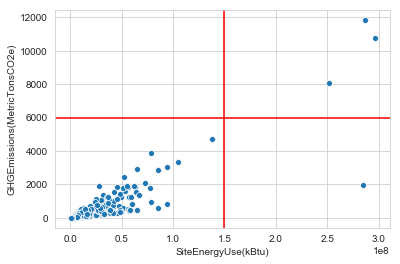

In [109]:
# identifions visuellement les outliers défini dans les données
sns.scatterplot(x="SiteEnergyUse(kBtu)", y='GHGEmissions(MetricTonsCO2e)', data=mod_data)
plt.axhline(y=6000, color='red', linestyle='-')
plt.axvline(x=150000000, color='red', linestyle='-')
plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/outliers.png', dpi=200, bbox_inches='tight')
plt.show()

In [110]:
# Suppression des batiments concernés
indexNames = data.loc[(data['GHGEmissions(MetricTonsCO2e)'] > 6000) | (data['SiteEnergyUse(kBtu)'] > 150000000)].index
mod_data.drop(indexNames , inplace=True)

In [111]:
# Vérification
mod_data.loc[data['GHGEmissions(MetricTonsCO2e)'] > 6000]

,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier,PrimaryPropertyType_clean,Latitude,Longitude,Address,Age_batiment
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,


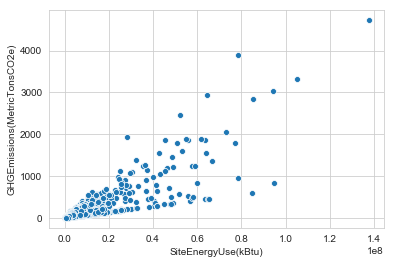

In [112]:
# visuellement - resultat
sns.scatterplot(x="SiteEnergyUse(kBtu)", y='GHGEmissions(MetricTonsCO2e)', data=mod_data)

In [113]:
mod_data.shape

(1522, 21)

In [114]:
# Sauvegarde de la table data (pour exploitation dans Carto)
mod_data.to_excel("mod_data.xlsx")

<a class="anchor" id="exploration"></a>
***
## 6. Exploration

<a class="anchor" id="types_bat"></a>
***
### 6.1. Comportements par types de bâtiments

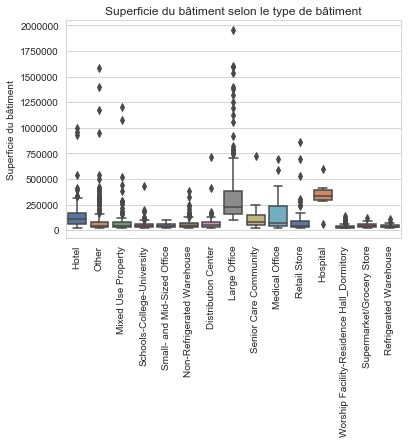

In [115]:
# Superficie du bâtiment selon le type de bâtiment
sns.boxplot(x="PrimaryPropertyType_clean", y="PropertyGFATotal", data=data, palette="deep")

plt.ylabel('Superficie du bâtiment')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Superficie du bâtiment selon le type de bâtiment')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/type vs superficie.png', dpi=200, bbox_inches='tight')
plt.show()

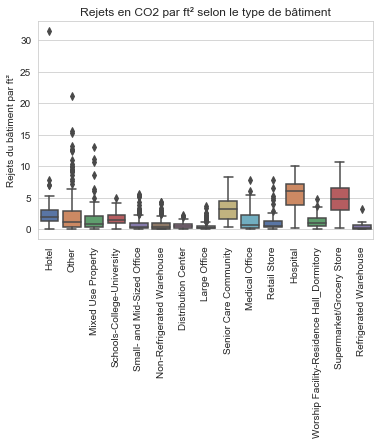

In [116]:
# Rejets en CO2 selon le type de bâtiment
sns.boxplot(x="PrimaryPropertyType_clean", y="GHGEmissionsIntensity(kgCO2e/ft2)", data=data, palette="deep")

plt.ylabel('Rejets du bâtiment par ft²')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Rejets en CO2 par ft² selon le type de bâtiment')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/type vs rejetsCO2.png', dpi=200, bbox_inches='tight')
plt.show()

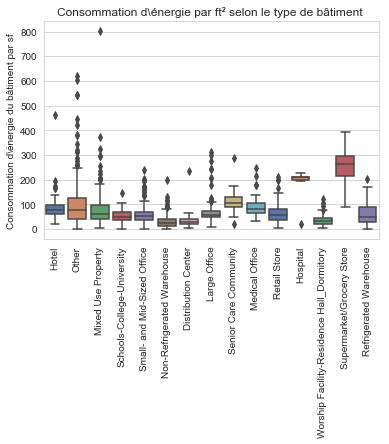

In [117]:
# Consommation d'énergie selon le type de bâtiment
sns.boxplot(x="PrimaryPropertyType_clean", y="SiteEUI(kBtu/sf)", data=data, palette="deep")

plt.ylabel('Consommation d\énergie du bâtiment par sf')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Consommation d\énergie par ft² selon le type de bâtiment ')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/type vs conso nrj.png', dpi=200, bbox_inches='tight')
plt.show()

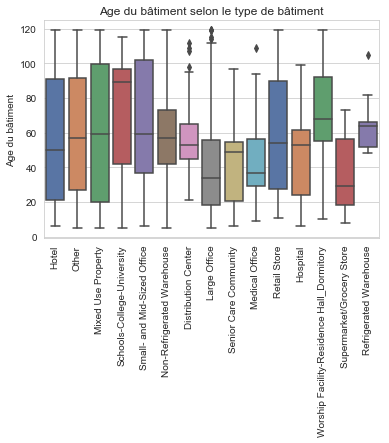

In [118]:
# Age du bâtiment selon le type de bâtiment

sns.boxplot(x="PrimaryPropertyType_clean", y="Age_batiment", data=data, palette="deep")

plt.ylabel('Age du bâtiment')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Age du bâtiment selon le type de bâtiment')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/type vs age.png', dpi=200, bbox_inches='tight')
plt.show()

<a class="anchor" id="totaux_bat"></a>
***
### 6.2. Totaux par type de bâtiments

In [119]:
# visualisation des valeurs de la variable
data_by_type = data.groupby(['PrimaryPropertyType_clean']).sum()[['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']]
data_by_type

,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
PrimaryPropertyType_clean,,,
Distribution Center,4108785,1.694403e+08,2649.22
Hospital,2367348,4.711338e+08,16195.40
Hotel,11731506,9.223022e+08,30549.44
Large Office,59893629,2.913606e+09,33734.86
Medical Office,6748536,5.327466e+08,12076.26
Mixed Use Property,9616279,7.989938e+08,15677.15
Non-Refrigerated Warehouse,12403250,3.478564e+08,8075.50
Other,24309654,2.071066e+09,50840.64
Refrigerated Warehouse,537720,4.343206e+07,417.72


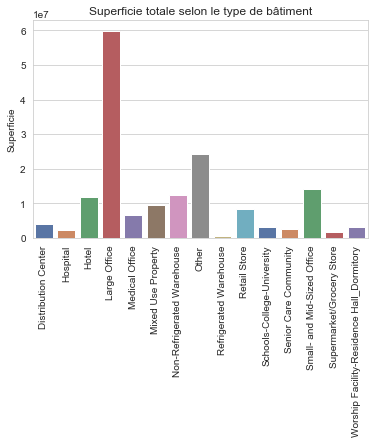

In [120]:
sns.barplot(x=data_by_type.index, y=data_by_type['PropertyGFATotal'], palette="deep")
plt.ylabel('Superficie')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Superficie totale selon le type de bâtiment')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/superficie_totale_par_type.png', dpi=200, bbox_inches='tight')
plt.show()

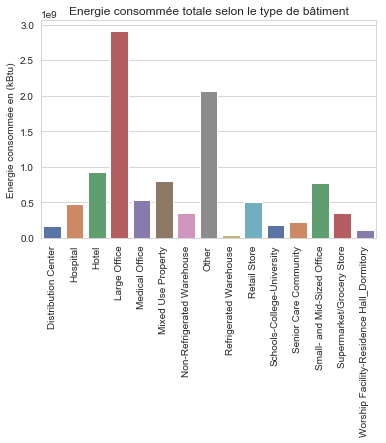

In [121]:
sns.barplot(x=data_by_type.index, y=data_by_type['SiteEnergyUse(kBtu)'], palette="deep")
plt.ylabel('Energie consommée en (kBtu)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Energie consommée totale selon le type de bâtiment')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/energie_par_type.png', dpi=200, bbox_inches='tight')
plt.show()

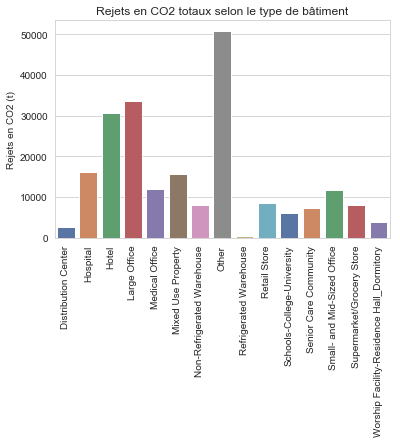

In [122]:
sns.barplot(x=data_by_type.index, y=data_by_type['GHGEmissions(MetricTonsCO2e)'], palette="deep")
plt.ylabel('Rejets en CO2 (t)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Rejets en CO2 totaux selon le type de bâtiment')

plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/rejetsCO2_par_type.png', dpi=200, bbox_inches='tight')
plt.show()

<a class="anchor" id="correlations"></a>
***
### 6.3. Corrélations

In [123]:
corr_table = data.corr()
corr_table.style.background_gradient()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Latitude,Longitude,Age_batiment
YearBuilt,1,0.112928,0.225309,0.304201,0.176641,-0.0619415,0.156571,0.210843,0.10749,-0.0190265,0.0870219,-0.00236285,-1
NumberofFloors,0.112928,1,0.763033,0.551175,0.738281,0.145542,0.00922792,0.559435,0.309781,-0.0468302,0.000855258,-0.0160745,-0.112928
PropertyGFATotal,0.225309,0.763033,1,0.689067,0.977292,0.158997,0.0217854,0.749753,0.460581,-0.0646446,-0.0211813,0.00211568,-0.225309
PropertyGFAParking,0.304201,0.551175,0.689067,1,0.519859,0.12983,0.0568608,0.439387,0.18022,-0.100822,0.0292022,-0.0232274,-0.304201
PropertyGFABuilding(s),0.176641,0.738281,0.977292,0.519859,1,0.151641,0.00905422,0.755313,0.490224,-0.0467215,-0.0335065,0.00928545,-0.176641
ENERGYSTARScore,-0.0619415,0.145542,0.158997,0.12983,0.151641,1,-0.404178,-0.0263393,-0.0822625,-0.282527,0.0484478,-0.0231407,0.0619415
SiteEUI(kBtu/sf),0.156571,0.00922792,0.0217854,0.0568608,0.00905422,-0.404178,1,0.432828,0.410931,0.717159,0.112569,-0.00749357,-0.156571
SiteEnergyUse(kBtu),0.210843,0.559435,0.749753,0.439387,0.755313,-0.0263393,0.432828,1,0.843288,0.273802,0.0163076,0.00652335,-0.210843
GHGEmissions(MetricTonsCO2e),0.10749,0.309781,0.460581,0.18022,0.490224,-0.0822625,0.410931,0.843288,1,0.494515,0.0242835,0.0232608,-0.10749
GHGEmissionsIntensity(kgCO2e/ft2),-0.0190265,-0.0468302,-0.0646446,-0.100822,-0.0467215,-0.282527,0.717159,0.273802,0.494515,1,0.05482,0.0125158,0.0190265


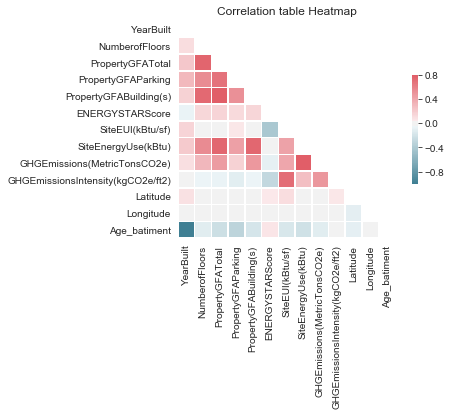

In [124]:
# Draw the heatmap with the mask and correct aspect ratio
# Sources : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=0.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation table Heatmap')
plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/correlation_table_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()

**Logique :**

Corrélations linéaires positives fortes entre :
- *NumberofFloors* et *PropertyGFATotal* - (0.74)
- *SiteEnergyUse(kBtu)* et 	*PropertyGFATotal* - (0.66)
- *GHGEmissions(MetricTonsCO2e)* et *SiteEnergyUse(kBtu)* - (0.87)
- *GHGEmissionsIntensity(kgCO2e/ft2)* et *SiteEUI(kBtu/sf)* - (0.70)

**Etonnant :**
- Pas de corrélation entre *Age_batiment* et *SiteEUI(kBtu/sf)* - (-0.16)

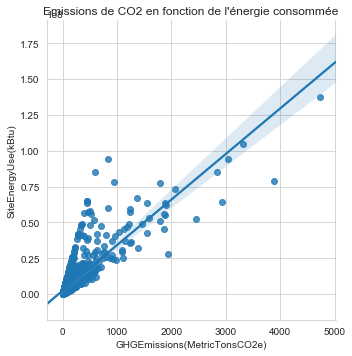

In [125]:
# Lmplpot
sns.lmplot(x="GHGEmissions(MetricTonsCO2e)", y="SiteEnergyUse(kBtu)", data=data)
plt.title('Emissions de CO2 en fonction de l\'énergie consommée')
plt.savefig('02 - Graphs/00 - Nettoyage et Exploration/lmplot_nrj_c02.png', dpi=200, bbox_inches='tight')
plt.show()

<a class="anchor" id="cartographie"></a>
***
### 6.4. Cartographie

In [126]:
# Carte des batiments non résidentiels de Seattle et leur consommation en energie par kBtu / sf
from IPython.display import IFrame
IFrame('https://yop1001.carto.com/builder/8ba30c5a-5705-44c1-8709-7fc1a1dc4b12/embed', width=700, height=700)

[Lien de la carte](https://yop1001.carto.com/builder/8ba30c5a-5705-44c1-8709-7fc1a1dc4b12/embed)

***

In [127]:
# Carte des batiments non résidentiels de Seattle et leur consommation moyenne en energie (kBtu / sf) par secteur
IFrame('https://yop1001.carto.com/builder/af5c3ea1-cbd1-4a78-bb94-0fe907f6eb17/embed', width=700, height=700)

[Lien de la carte](https://yop1001.carto.com/builder/af5c3ea1-cbd1-4a78-bb94-0fe907f6eb17/embed)

***

In [128]:
# Carte des batiments non résidentiels de Seattle et leur consommation moyenne en energie (kBtu / sf) par secteur
IFrame('https://yop1001.carto.com/builder/6a130867-a01c-4bab-aa91-c9ba18a08a01/embed', width=700, height=700)

[Lien de la carte](https://yop1001.carto.com/builder/6a130867-a01c-4bab-aa91-c9ba18a08a01/embed)

In [129]:
# Table croisée entre Neighborhood et CouncilDistrictCode
pd.crosstab(data['PrimaryPropertyType_clean'], data['Neighborhood'])

Neighborhood,BALLARD,CENTRAL,DELRIDGE,DOWNTOWN,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST
PrimaryPropertyType_clean,,,,,,,,,,,,,
Distribution Center,1,0,5,0,0,42,2,3,0,0,0,0,0
Hospital,1,1,0,0,1,0,1,0,0,1,1,0,1
Hotel,1,0,0,40,5,2,9,6,0,6,4,0,0
Large Office,0,0,1,104,0,10,31,18,1,4,0,0,0
Medical Office,0,3,1,4,15,0,2,1,4,8,3,2,1
Mixed Use Property,6,1,0,29,14,13,17,7,3,7,2,2,3
Non-Refrigerated Warehouse,11,3,6,9,5,134,9,14,4,7,7,3,3
Other,10,10,9,48,22,47,12,30,16,16,17,7,8
Refrigerated Warehouse,0,0,0,0,0,13,0,0,0,0,0,0,0


In [130]:
data.shape

(1522, 21)

***

In [131]:
# Voir toutes les variables
%whos 

Variable                   Type                       Data/Info
---------------------------------------------------------------
IFrame                     type                       <class 'IPython.lib.display.IFrame'>
a                          float                      1.0
b                          float                      3.0
bat_par_type               Series                     Small- and Mid-Sized Offi<...>yType_clean, dtype: int64
bat_per_year               Series                     1900    45\n1901     2\n1<...>Length: 112, dtype: int64
buildings_1900             DataFrame                                       Addr<...>n\n[226 rows x 3 columns]
buildings_1900_from_data   DataFrame                                         Pr<...>n\n[45 rows x 21 columns]
c                          float                      2.0
cmap                       LinearSegmentedColormap    <matplotlib.colors.Linear<...>ct at 0x000002218689DF60>
comparaison                function                   <fu

***
[Top de la page](#top)